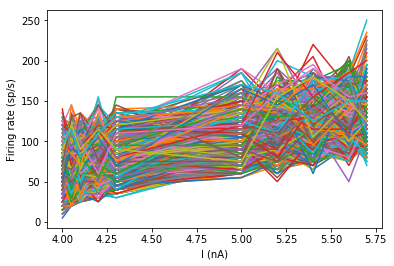

In [4]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex. tools import input_factory, plot_tools

v_rest= -70*b2.mV
v_reset= -65*b2.mV
membrane_resistance = 5 * b2.Mohm
membrane_capacitance = 2*b2.nF
firing_threshold = -50 * b2.mV

simulation_time = 200
dt =  0.1 * b2.ms 

current = [4.00001, 4.05, 4.1, 4.2, 4.3, 5., 5.2, 5.4, 5.6, 5.7]

N = len(current)

eqs = '''
dv/dt =
( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + 
(current/membrane_capacitance) +
(current*sigma*xi*dt**0.5/membrane_capacitance)  : volt 
current : amp
'''
    
plt.figure(1)
sigma = np.arange(0, 10, 0.01)
    
for sigma in sigma:
    neuron = b2.NeuronGroup(N, model=eqs, reset="v=v_reset", threshold="v>firing_threshold",
        refractory=False, method="euler", dt = dt)
    neuron.v = v_rest
    neuron.current = current*b2.nA
    
    state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)
    b2.run(simulation_time*b2.ms)
    
    plt.plot(neuron.current /b2.nA, spike_monitor.count*1000/simulation_time, 
             label = "Sigma: {}".format(sigma))
    
plt.xlabel('I (nA)')
plt.ylabel('Firing rate (sp/s)')
#plt.legend()
plt.show()

# gráfico para verificar o comportamento da curva F-I para diferentes valores de sigma


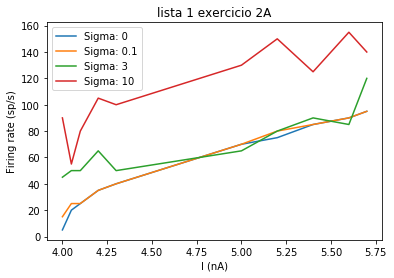

In [5]:
# Exercício 2A: a. Faça o gráfico de F-I para o modelo com ruído para dois valores 
# diferentes de  σ . Para fazer isso, vá aumentando o valor de σ  a partir de zero
# até notar que a curva F-I começa a ficar diferente da curva para σ = 0.
# Este será o seu primeiro valor de σ . Depois, continue aumentando 
# σ até notar outra mudança significativa na curva F-I. Este será o seu segundo valor de σ.
# Apresente os gráficos de F-I para os dois valores de σ e explique o que é observado.

%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex. tools import input_factory, plot_tools

v_rest= -70*b2.mV
v_reset= -65*b2.mV
membrane_resistance = 5 * b2.Mohm
membrane_capacitance = 2*b2.nF
firing_threshold = -50 * b2.mV

simulation_time = 200
dt =  0.1 * b2.ms 

current = [4.00001, 4.05, 4.1, 4.2, 4.3, 5., 5.2, 5.4, 5.6, 5.7]

N = len(current)

eqs = '''
dv/dt =
( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + 
(current/membrane_capacitance) + 
(current*sigma*xi*dt**0.5/membrane_capacitance)  : volt 
current : amp
'''
    
plt.figure(1)
sigma = [0, 0.1, 3,10]
    
for sigma in sigma:
    neuron = b2.NeuronGroup(N, model=eqs, reset="v=v_reset", threshold="v>firing_threshold",
        refractory=False, method="euler", dt = dt)
    neuron.v = v_rest
    neuron.current = current*b2.nA
    
    state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)
    b2.run(simulation_time*b2.ms)
    
    plt.plot(neuron.current /b2.nA, spike_monitor.count*1000/simulation_time, 
             label = "Sigma: {}".format(sigma))
    
plt.xlabel('I (nA)')
plt.ylabel('Firing rate (sp/s)')
plt.legend()
plt.title( "lista 1 exercicio 2A")
plt.show()

# Conclusão: Com o aumento do valor de sigma, a curva de F-I tende a aumentar
# a frequência de disparo e também aumentar sua flutuabilidade.

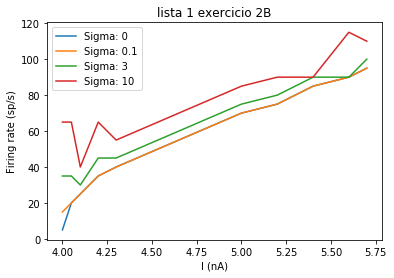

In [5]:


%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex. tools import input_factory, plot_tools

v_rest= -70*b2.mV
v_reset= -65*b2.mV
membrane_resistance = 5 * b2.Mohm
membrane_capacitance = 2*b2.nF
firing_threshold = -50 * b2.mV

simulation_time = 200
dt =  0.01 * b2.ms 

current = [4.00001, 4.05, 4.1, 4.2, 4.3, 5., 5.2, 5.4, 5.6, 5.7]

sigma = [0, 0.1, 3, 10]

N = len(current)

eqs = '''
dv/dt =
( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) +
(current/membrane_capacitance) + 
(current*sigma*xi*dt**0.5/membrane_capacitance)  : volt 
current : amp
'''
    
for sigma in sigma:
    neuron = b2.NeuronGroup(N, model=eqs, reset="v=v_reset", threshold="v>firing_threshold",
        refractory=False, method="euler", dt = dt)
    neuron.v = v_rest
    neuron.current = current*b2.nA
    
    state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)
    b2.run(simulation_time*b2.ms)
    
    plt.plot(neuron.current /b2.nA, spike_monitor.count*1000/simulation_time, 
             label = "Sigma: {}".format(sigma))
    
plt.xlabel('I (nA)')
plt.ylabel('Firing rate (sp/s)')
plt.legend()
plt.title( "lista 1 exercicio 2B")
plt.show()

# Conclusão: Com o valor dt menor, 0.01ms, as curvas ficaram mais suavizadas e 
# a frequência de disparos de sigma = 10 diminui. Aparementemente os resultados
# foram diferentes. 
